## Ship Building Stock Analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf

### GRSE.NS

#### Loading Desired Data from Yahoo Finance.

In [2]:
gres = yf.download('GRSE.NS', start="2019-01-01", end="2023-12-30")
gres.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,93.800003,93.800003,92.000000,92.449997,77.758400,6696
2019-01-02,91.000000,94.500000,90.800003,93.349998,78.515404,6727
2019-01-03,93.699997,94.050003,90.050003,93.650002,78.767715,27865
2019-01-04,92.449997,94.699997,91.800003,92.449997,77.758400,3931
2019-01-07,93.800003,100.800003,92.000000,95.449997,80.281662,40965


In [3]:
gres.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [4]:
gres.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,290.356194,297.655668,284.350688,290.118664,280.721695,6.208744e+05
std,193.980989,198.550783,190.148406,193.822841,198.388579,1.202041e+06
min,81.449997,82.349998,80.099998,81.150002,68.254143,0.000000e+00
25%,181.099998,185.550003,178.050003,181.125000,170.329102,1.364230e+05
50%,210.500000,216.000000,205.050003,209.800003,196.312164,2.697960e+05
75%,356.949997,363.574997,346.099991,352.375000,347.727676,6.012760e+05
max,924.750000,974.799988,879.049988,906.900024,906.099426,1.496990e+07


In [5]:
gres.rename(columns={"Adj Close": "price_t"}, inplace=True)
gres.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,93.800003,93.800003,92.000000,92.449997,77.758400,6696
2019-01-02,91.000000,94.500000,90.800003,93.349998,78.515404,6727
2019-01-03,93.699997,94.050003,90.050003,93.650002,78.767715,27865
2019-01-04,92.449997,94.699997,91.800003,92.449997,77.758400,3931
2019-01-07,93.800003,100.800003,92.000000,95.449997,80.281662,40965


#### Calculate Daily Returns.

In [6]:
gres['daily_returns']=gres["price_t"].pct_change()
gres

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,93.800003,93.800003,92.000000,92.449997,77.758400,6696,NaN
2019-01-02,91.000000,94.500000,90.800003,93.349998,78.515404,6727,0.009735
2019-01-03,93.699997,94.050003,90.050003,93.650002,78.767715,27865,0.003214
2019-01-04,92.449997,94.699997,91.800003,92.449997,77.758400,3931,-0.012814
2019-01-07,93.800003,100.800003,92.000000,95.449997,80.281662,40965,0.032450
...,...,...,...,...,...,...,...
2023-12-22,821.799988,834.700012,813.250000,819.650024,819.650024,424135,0.003182
2023-12-26,822.000000,884.750000,820.000000,872.200012,872.200012,3921279,0.064113
2023-12-27,878.049988,904.500000,862.000000,871.150024,871.150024,3060990,-0.001204


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

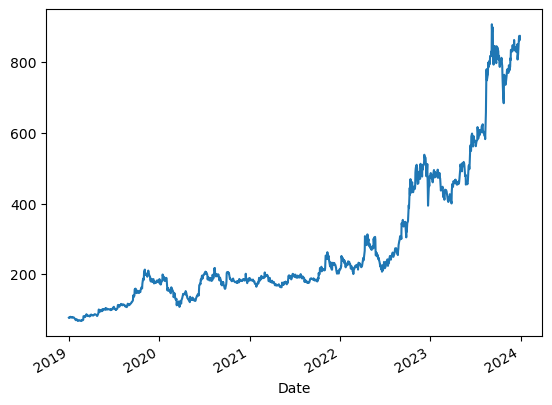

In [7]:
gres['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

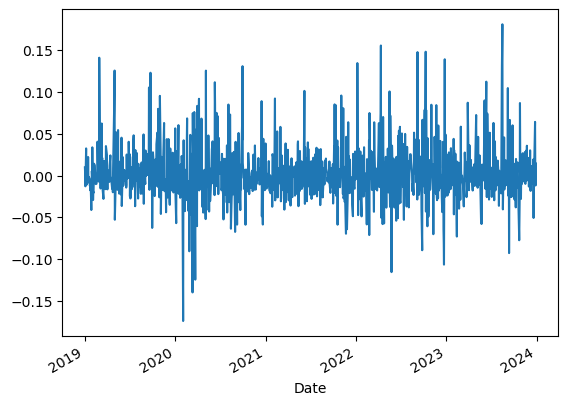

In [8]:
gres['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of ADANIPORTS is in the downtrend in early 2020 and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

#### Moving Average

In [9]:
gres['mov_avg'] = gres['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

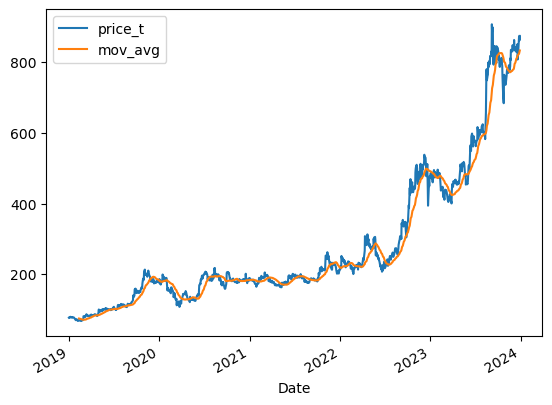

In [10]:
gres[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [11]:
gres['Log_Ret'] = np.log(gres['price_t'] / gres['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
gres['volatility'] = gres['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

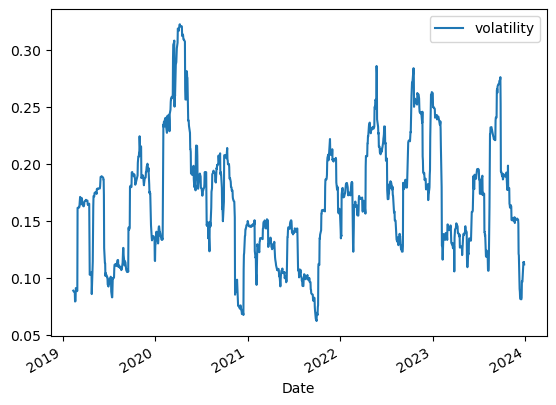

In [12]:
gres[['volatility']].plot()

### R SI (30-Day)

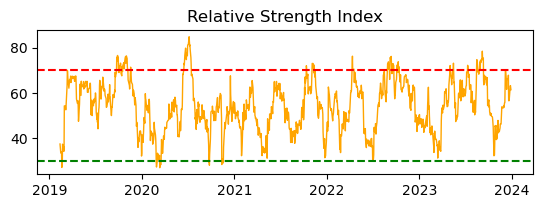

In [13]:
change = gres["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

### MAZDOCK.NS

#### Loading Desired Data from Yahoo Finance.

In [14]:
mazdock = yf.download('MAZDOCK.NS', start="2019-01-01", end="2023-12-30")
mazdock.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-12,214.899994,216.949997,171.949997,171.949997,158.279785,39928977
2020-10-13,172.000000,184.699997,164.000000,181.449997,167.024567,18857924
2020-10-14,180.449997,187.399994,178.100006,182.250000,167.760941,6177891
2020-10-15,181.949997,182.750000,171.000000,171.850006,158.187759,3193458
2020-10-16,173.750000,175.449997,165.000000,168.050003,154.689865,3072442


#### Cleaning Process

In [15]:
mazdock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 798 entries, 2020-10-12 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       798 non-null    float64
 1   High       798 non-null    float64
 2   Low        798 non-null    float64
 3   Close      798 non-null    float64
 4   Adj Close  798 non-null    float64
 5   Volume     798 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 43.6 KB


In [16]:
mazdock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,798.000000,798.000000,798.000000,798.000000,798.000000,7.980000e+02
mean,641.789913,656.717857,629.121366,641.330452,629.812947,2.061006e+06
std,619.558027,633.245026,606.770191,617.748669,617.093918,3.513943e+06
min,166.500000,167.899994,164.000000,165.800003,152.618713,0.000000e+00
25%,245.924995,249.962498,241.512501,245.400005,234.262360,4.199692e+05
50%,279.500000,284.949997,275.250000,278.799988,270.449768,8.584445e+05
75%,782.750000,795.949997,762.575012,780.262482,770.148148,1.991877e+06
max,2354.100098,2484.699951,2276.649902,2342.350098,2342.350098,3.992898e+07


In [17]:
mazdock.rename(columns={"Adj Close": "price_t"}, inplace=True)
mazdock.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2020-10-12,214.899994,216.949997,171.949997,171.949997,158.279785,39928977
2020-10-13,172.000000,184.699997,164.000000,181.449997,167.024567,18857924
2020-10-14,180.449997,187.399994,178.100006,182.250000,167.760941,6177891
2020-10-15,181.949997,182.750000,171.000000,171.850006,158.187759,3193458
2020-10-16,173.750000,175.449997,165.000000,168.050003,154.689865,3072442


#### Calculate Daily Returns.

In [18]:
mazdock['daily_returns']=mazdock["price_t"].pct_change()
mazdock

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2020-10-12,214.899994,216.949997,171.949997,171.949997,158.279785,39928977,NaN
2020-10-13,172.000000,184.699997,164.000000,181.449997,167.024567,18857924,0.055249
2020-10-14,180.449997,187.399994,178.100006,182.250000,167.760941,6177891,0.004409
2020-10-15,181.949997,182.750000,171.000000,171.850006,158.187759,3193458,-0.057064
2020-10-16,173.750000,175.449997,165.000000,168.050003,154.689865,3072442,-0.022112
...,...,...,...,...,...,...,...
2023-12-22,2135.000000,2139.000000,2090.050049,2121.399902,2121.399902,636683,0.000189
2023-12-26,2128.000000,2332.000000,2125.050049,2287.850098,2287.850098,8792919,0.078462
2023-12-27,2301.000000,2383.000000,2258.000000,2342.350098,2342.350098,4564324,0.023821


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

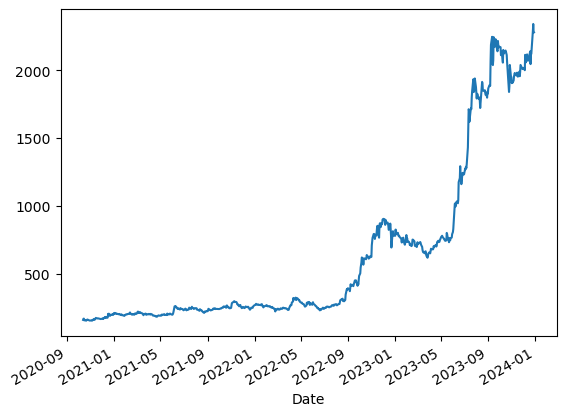

In [19]:
mazdock['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

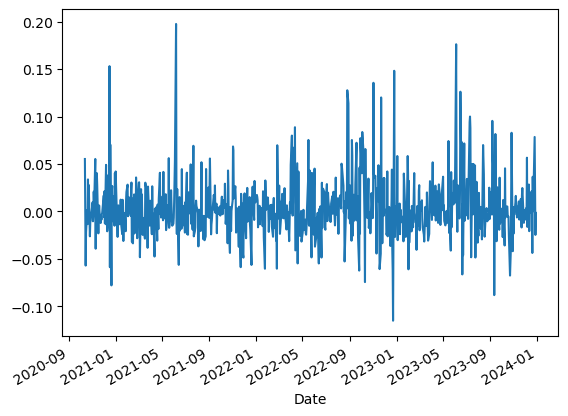

In [20]:
mazdock['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of MADZOCK is in the downtrend in early 2023-1  and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

#### Moving Average

In [21]:
mazdock['mov_avg'] = mazdock['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

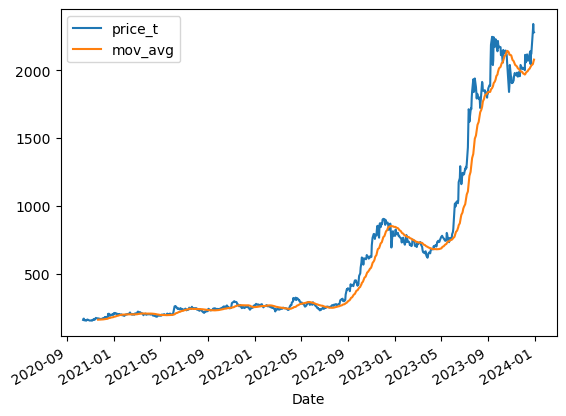

In [22]:
mazdock[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [23]:
mazdock['Log_Ret'] = np.log(mazdock['price_t'] / mazdock['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
mazdock['volatility'] = mazdock['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

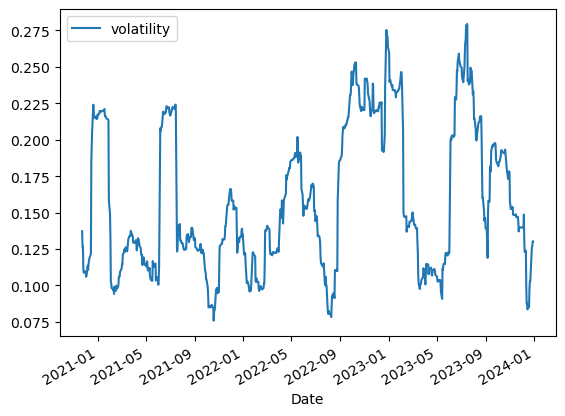

In [24]:
mazdock[['volatility']].plot()

### R SI (30-Day)

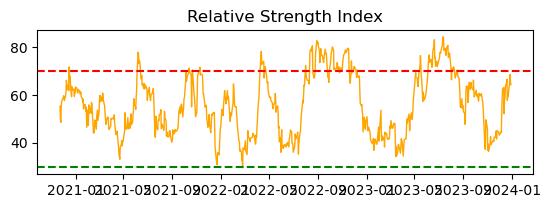

In [25]:
change = mazdock["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')